<a href="https://colab.research.google.com/github/alind7402/BTCPrediction/blob/main/Random_Forest_Regression_Period1_hasETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains code from [Analysis of Bitcoin Price Prediction Using Machine Learning](https://www.mdpi.com/1911-8074/16/1/51) by Junwei Chen, which we use to compare our results against. The only change to the original code is translated comments from Japanese to English. The original code can be found [here](https://github.com/shiitake-github/jrfm-2156907-data).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

# Translated initial comments to English

# Preprocess

In [ ]:
total = pd.read_csv("https://raw.githubusercontent.com/shiitake-github/jrfm-2156907-data/main/jrfm-2156907.csv")
total = total.loc[:2558,:] # Delete NULL values ​​after April 1st
total = total.fillna(method='ffill')
for index in total.index:
  total.loc[index, "Date"] = datetime.strptime(str(total.loc[index, "Date"])[:10], '%Y/%m/%d').date()

<ipython-input-24-798232f9858b>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  total = total.fillna(method='ffill')


In [ ]:
Start_day = date(2015, 8, 7) # Since ETH was not created before August 7, 2015
Test_day = date(2018, 4, 1)
End_day = date(2018, 9, 30)

# train, test
total = total[(total["Date"] >= Start_day) & (total["Date"] <= End_day) ].reset_index(drop = True)
train_dataset = total[total["Date"] < Test_day].reset_index(drop = True)
test_dataset = total[total["Date"] >= Test_day].reset_index(drop = True)

In [ ]:
# Separate into explanatory variables and target variables
X_train = train_dataset.drop(["Date"], axis=1)[:-1]
Y_train = train_dataset["BTC_Close"][1:]

X_test = test_dataset.drop(["Date"], axis=1)[:-1]
Y_test = test_dataset["BTC_Close"][1:]

# Model

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Construct a regression tree with a depth of 10 using random forest, 500 trees
simpleTree = RandomForestRegressor(max_depth=10, n_estimators=500)
simpleTree.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

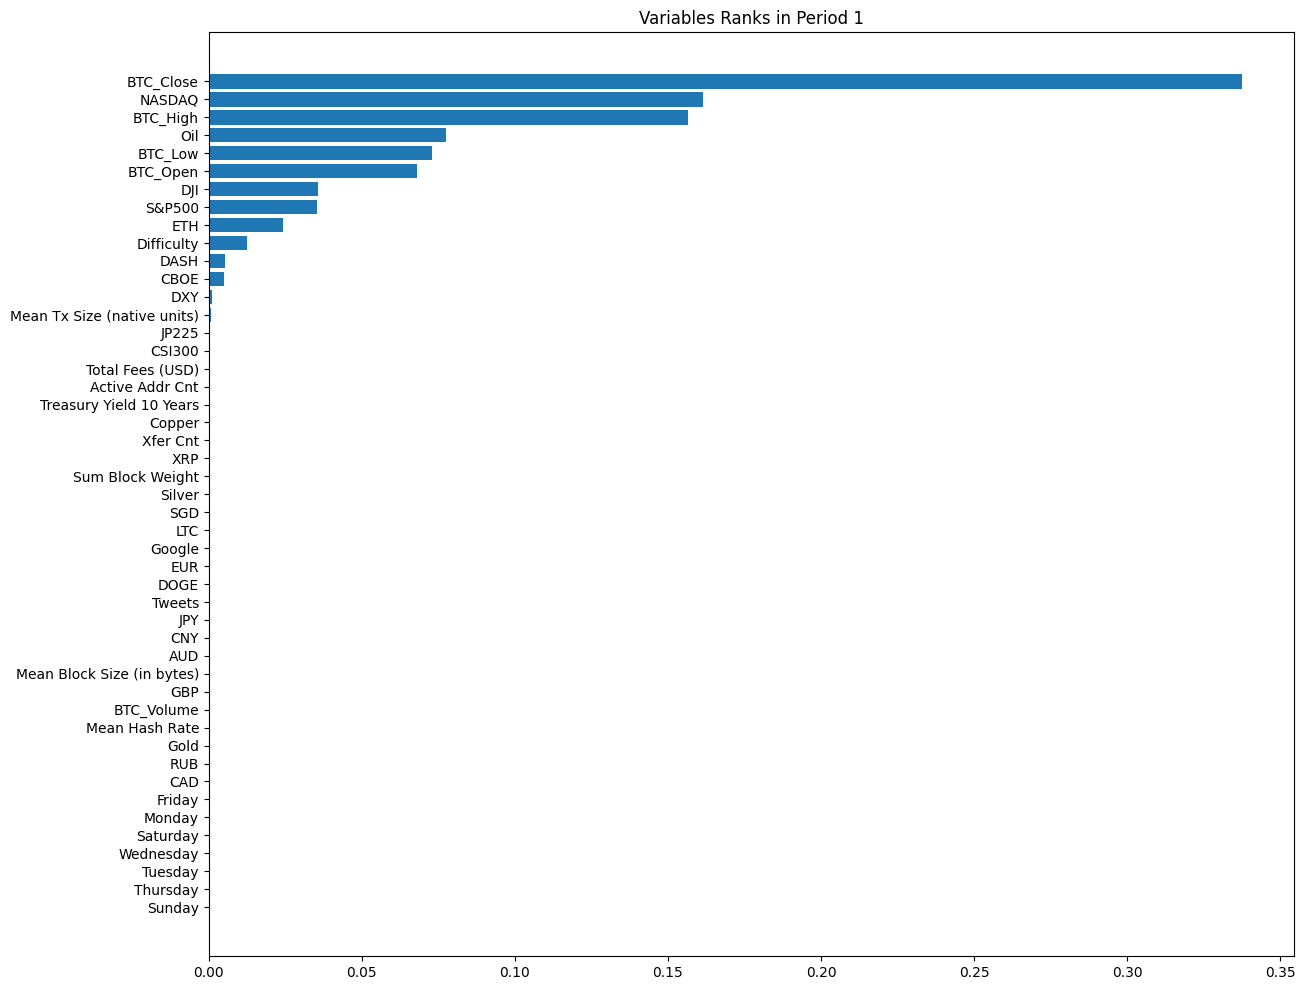

In [ ]:
# Importance of variables
features = X_train.columns
importances = simpleTree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(14,12))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.title("Variables Ranks in Period 1")
plt.show()

# Test

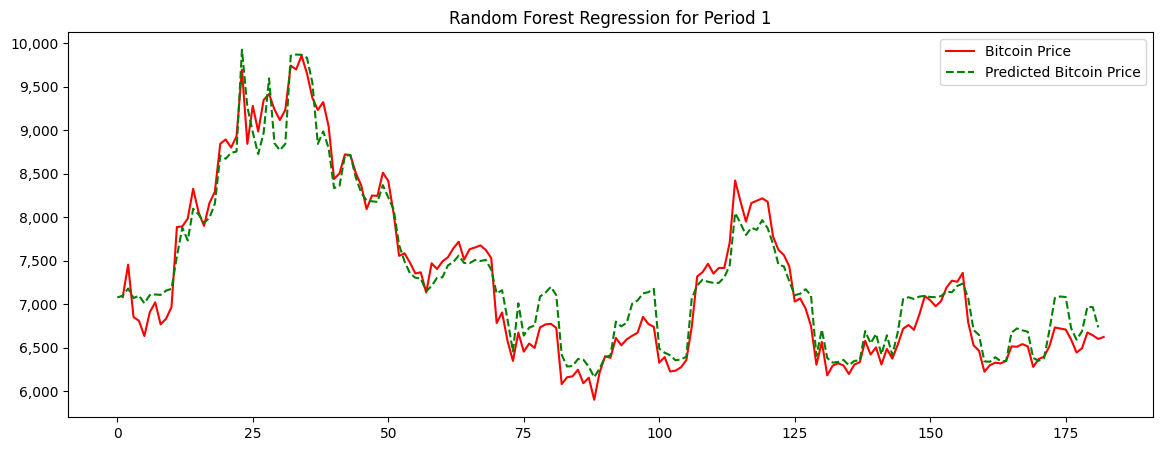

In [ ]:
# Comparison of predicted and observed values
Y_pred  = simpleTree.predict(X_test)
# added afterwards
# prediction and true rise/fall value
# true if rise, false if fall
y_pred_RF = np.diff(Y_pred) > 0
y_true_RF = np.diff(Y_test) > 0
y_pred_RF = np.insert(y_pred_RF, 0, False)
y_true_RF = np.insert(y_true_RF, 0, False)

correct_predictions = np.sum(y_pred_RF == y_true_RF)
accuracy_RF = correct_predictions / len(y_pred_RF)

# Displaying prediction results
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
ax.plot(Y_test, color = 'red', label="Bitcoin Price")
ax.plot(Y_pred, color = 'green', label="Predicted Bitcoin Price", linestyle="dashed")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # write a comma every 3 digits
plt.title("Random Forest Regression for Period 1")
plt.legend()
plt.show()

In [ ]:
print(f"\nAccuracy of Predicted vs. True Price Rise: {accuracy_RF * 100:.2f}%")


Accuracy of Predicted vs. True Price Rise: 50.55%


In [ ]:
# Calculating prediction error
#RMSE
from sklearn.metrics import mean_squared_error
print("RMSE:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print()

# MAPE
MAPE = np.average(np.abs((Y_test.values - Y_pred) / Y_test.values))
print("MAPE:", MAPE)
print()

# DA
Y_test_DA = np.array(Y_test)
Y_pred_0 = Y_pred[1:] - Y_test_DA[:-1]
Y_test_0 = Y_test[1:] - Y_test_DA[:-1]
DA = (Y_pred_0<0) == (Y_test_0<0)
print("DA accuracy:", f"{round(np.mean(DA)*100, 2)}%")

RMSE: 319.5778673840544

MAPE: 0.03286109079763815

DA accuracy: 53.04%
